In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/home/alpha/2410/2410-machine-learning/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Total Missing Values:', df.isnull().sum().sum())
print('Total Duplicated Values:', df.duplicated().sum())

Total Missing Values: 0
Total Duplicated Values: 0


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

# Statistical Summary

In [11]:
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
des_stats = pd.DataFrame() # Create an empty DataFrame


# Central Tendency
des_stats['mean'] = df.mean() # Get the mean of each column
des_stats['median'] = df.median() # Get the median of each column
des_stats['mode'] = df.mode().loc[0] # Get the mode of each column

# Dispersion
des_stats['range'] = [np.ptp(df[i]) for i in df.columns]
des_stats['std'] = df.std() # Get the standard deviation of each column
des_stats['variance'] = df.var() # Get the variance of each column
des_stats['skewness'] = df.skew() # Get the skewness of each column
des_stats['kurtosis'] = df.kurtosis() # Get the kurtosis of each column
des_stats['iqr'] = df.quantile(0.75) - df.quantile(0.25) # Get the interquartile range of each column
des_stats['25%'] = df.quantile(0.25) # Get the 25th percentile of each column
des_stats['50%'] = df.quantile(0.50) # Get the 50th percentile of each column
des_stats['75%'] = df.quantile(0.75) # Get the 75th percentile of each column

des_stats.T.round(2)


,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
median,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
mode,1.00,99.00,70.00,0.00,0.00,32.00,0.25,22.00,0.00
range,17.00,199.00,122.00,99.00,846.00,67.10,2.34,60.00,1.00
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
variance,11.35,1022.25,374.65,254.47,13281.18,62.16,0.11,138.30,0.23
skewness,0.90,0.17,-1.84,0.11,2.27,-0.43,1.92,1.13,0.64
kurtosis,0.16,0.64,5.18,-0.52,7.21,3.29,5.59,0.64,-1.60
iqr,5.00,41.25,18.00,32.00,127.25,9.30,0.38,17.00,1.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00


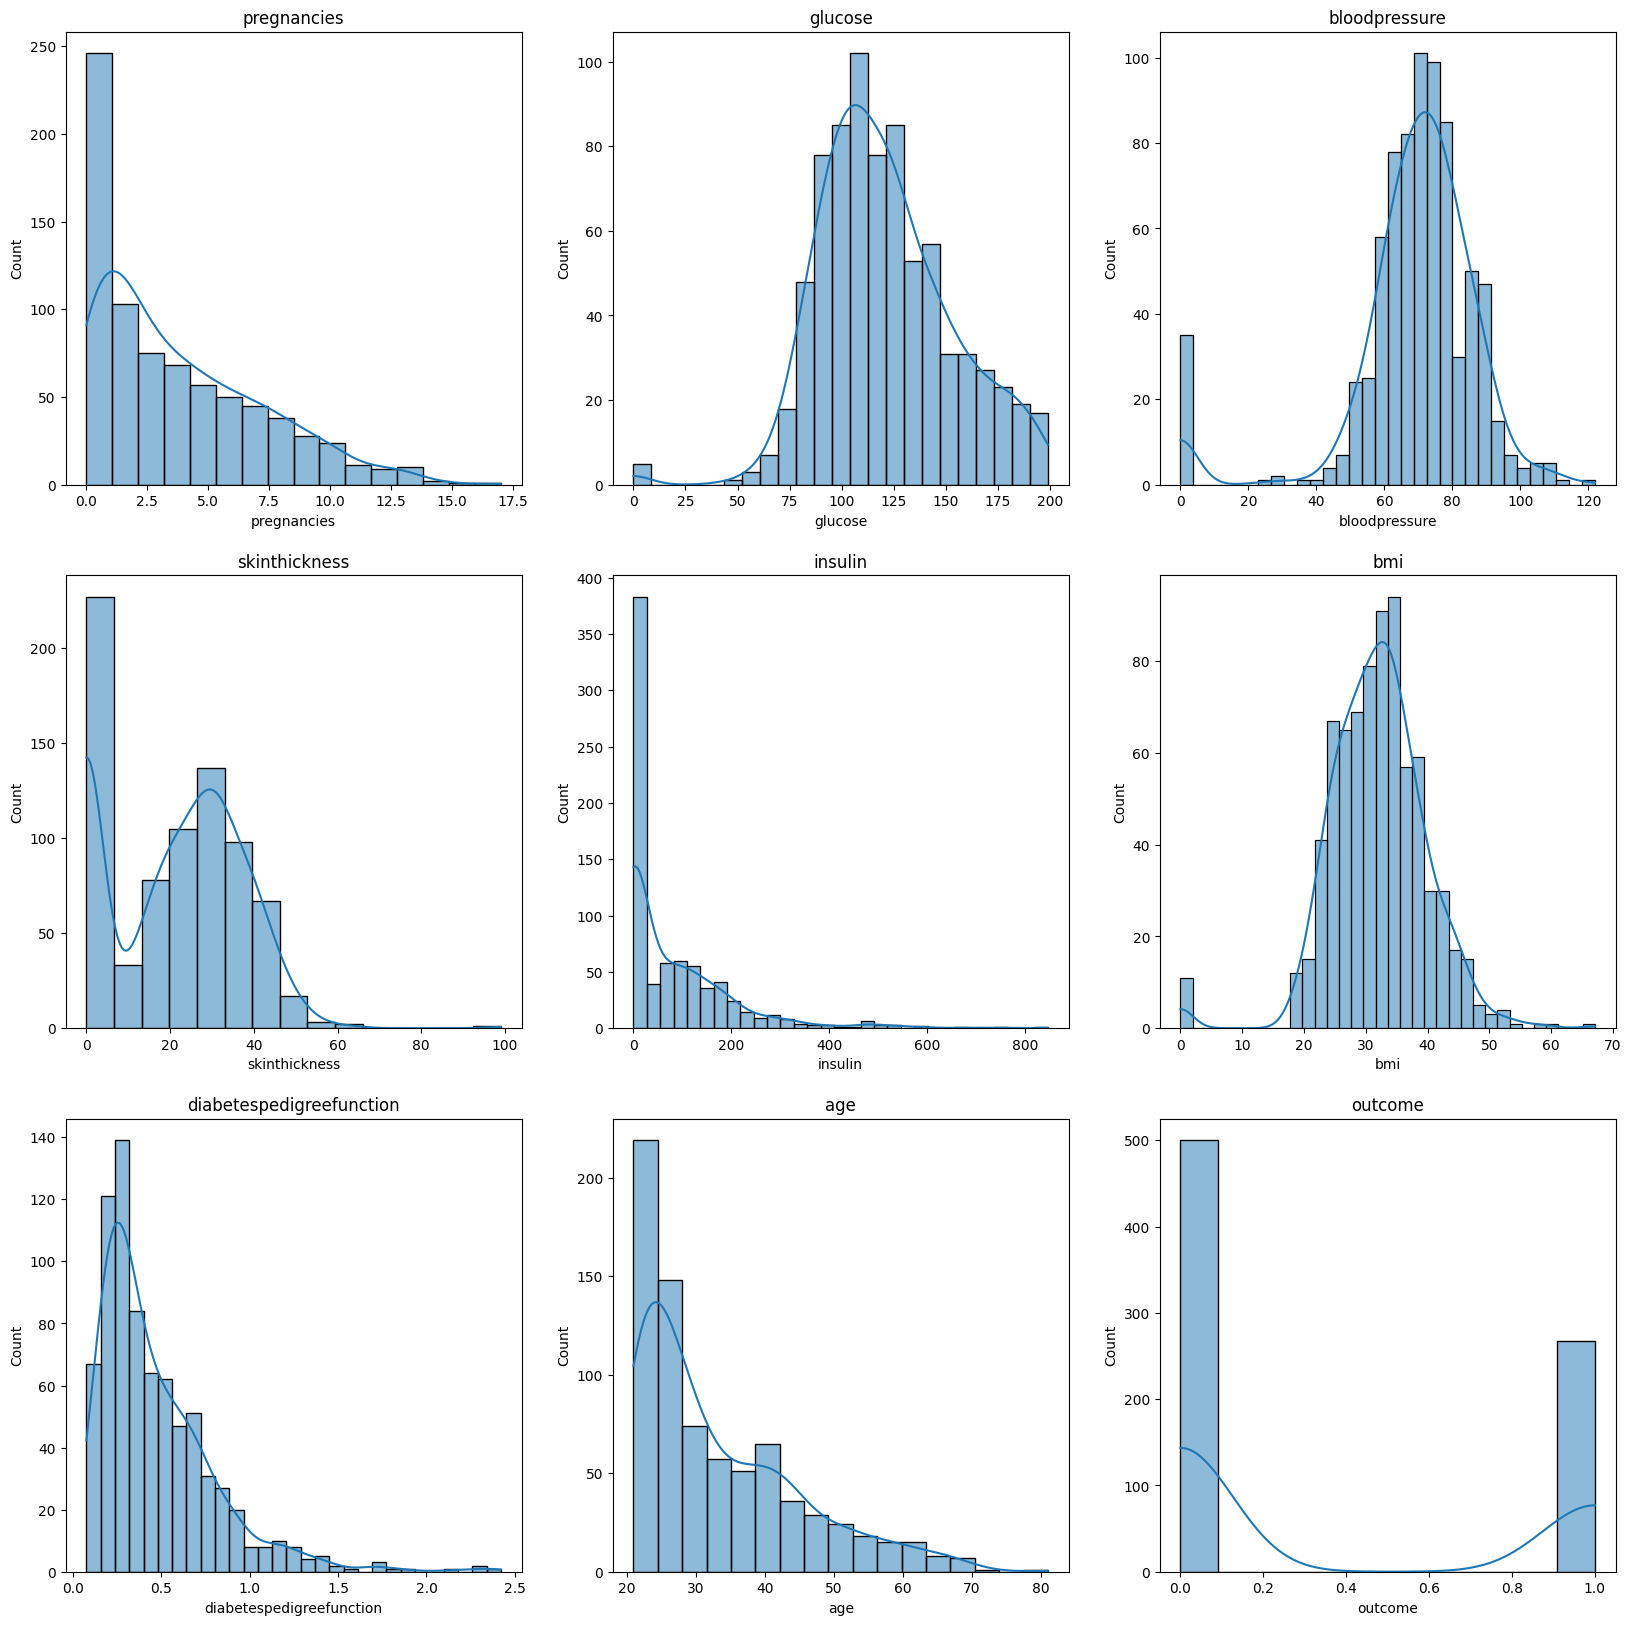

In [ ]:
# Plotting the distribution of the data
plt.figure(figsize=(20, 20)) # taking a canvas of 20*20 pixels
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1) # vertical 3 and horizontal 3
    sns.histplot(df[col], kde=True)
    plt.title(col)

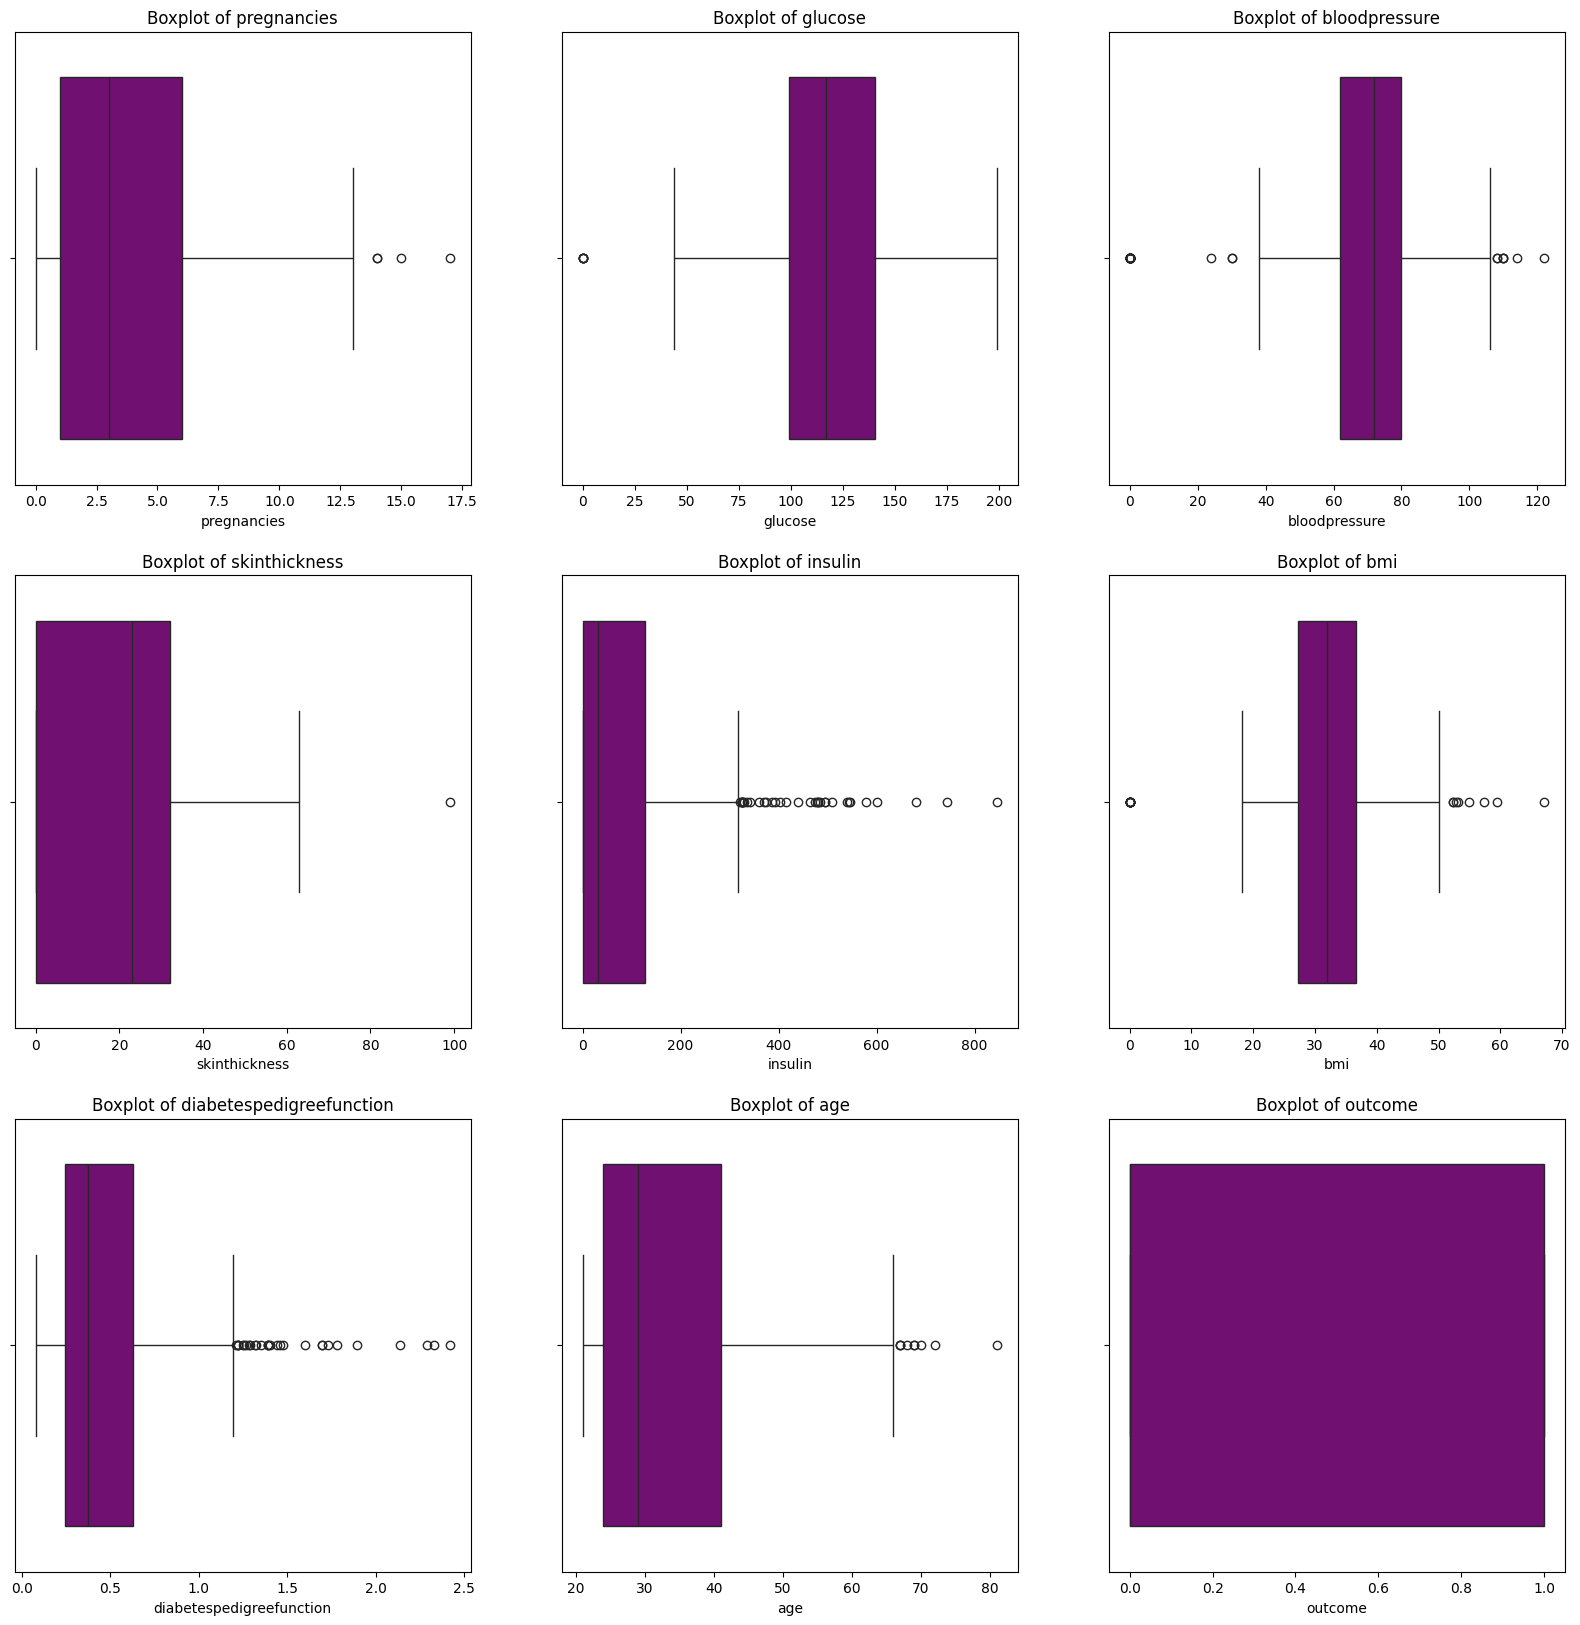

In [36]:
# Outlier Using Box Plot

plt.figure(figsize=(20, 20))
# Identifying and handling outliers
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df, x = col, color = 'purple')
    plt.title(f'Boxplot of {col}')
plt.show()

In [37]:
# Detecting Outliers using Z-Score
from scipy.stats import zscore


z_scores = zscore(df)
outliers = (np.abs(z_scores) > 3)
outliers.sum()

pregnancies                  4
glucose                      5
bloodpressure               35
skinthickness                1
insulin                     18
bmi                         14
diabetespedigreefunction    11
age                          5
outcome                      0
dtype: int64

In [40]:
# detecting outliers using IQR method

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1

higher_fence = Q3+1.5*IQR
lower_fence = Q1-1.5*IQR

((df < lower_fence) | (df > higher_fence)).sum()

pregnancies                  0
glucose                      5
bloodpressure               37
skinthickness                1
insulin                     17
bmi                         14
diabetespedigreefunction    10
age                          1
outcome                      0
dtype: int64

In [41]:
df.shape

(768, 9)